2018E028

DHARMASENA T. A. P

LAB 05

In [32]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
% matplotlib inline

UsageError: Line magic function `%` not found.


In [33]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
df = df.drop_duplicates()
print(df)

       39          State-gov   77516    Bachelors   13        Never-married  \
0      50   Self-emp-not-inc   83311    Bachelors   13   Married-civ-spouse   
1      38            Private  215646      HS-grad    9             Divorced   
2      53            Private  234721         11th    7   Married-civ-spouse   
3      28            Private  338409    Bachelors   13   Married-civ-spouse   
4      37            Private  284582      Masters   14   Married-civ-spouse   
...    ..                ...     ...          ...  ...                  ...   
32555  27            Private  257302   Assoc-acdm   12   Married-civ-spouse   
32556  40            Private  154374      HS-grad    9   Married-civ-spouse   
32557  58            Private  151910      HS-grad    9              Widowed   
32558  22            Private  201490      HS-grad    9        Never-married   
32559  52       Self-emp-inc  287927      HS-grad    9   Married-civ-spouse   

             Adm-clerical   Not-in-family   White  

In [34]:
with open('adult.names') as fp:
    cols = []
    for line in fp:
        sre = re.match(r'(?P<colname>[a-z\-]+):.*\.', line)
        if sre:
            cols.append(sre.group('colname'))
    cols.append('label')
cols

df.columns = cols
df_features = list(df.columns)
print(df_features)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']


In [35]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

In [36]:
print((df[['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']]== ' ?').sum())

# null values

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
label                0
dtype: int64


In [37]:
print((df[['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']]== 0).sum())

#'capital-gain' and 'capital-loss' can be zero so these values kept without changing

age                   0
workclass             0
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation            0
relationship          0
race                  0
sex                   0
capital-gain      29825
capital-loss      31017
hours-per-week        0
native-country        0
label                 0
dtype: int64


In [38]:
df[['workclass','occupation','native-country']] = df[['workclass','occupation','native-country']].replace(' ?', np.nan)
df.fillna(df.mode(), inplace=True)

In [39]:
print((df[['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']]== ' ?').sum())
print(df)
#'capital-gain' and 'capital-loss' can be zero so these values kept without changing

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64
       age          workclass  fnlwgt    education  education-num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9 

In [40]:
df[['label']] = df[['label']].replace(' <=50K', 0)
df[['label']] = df[['label']].replace(' >50K', 1)

In [41]:
df = df.drop_duplicates()

In [42]:
for col in df:
    print(df[col].unique())

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 83311 215646 234721 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' nan ' Protective-serv' ' Armed-Forces' ' Priv

In [43]:
labelencoder = LabelEncoder()
df = df.astype(str).apply(labelencoder.fit_transform)

In [44]:
X = df.drop(["label"], axis =1)

In [45]:
Y = df["label"]

In [46]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=41)

In [47]:
# knn model n = 7
knn_n7 = KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)

In [48]:
Y_predict_n7 =knn_n7.predict(X_test)

In [49]:
accuracy = sm.accuracy_score(Y_test, Y_predict_n7)
precision = sm.precision_score(Y_test, Y_predict_n7)
recall = sm.recall_score(Y_test, Y_predict_n7)
print("Accuracy(%) = ", accuracy*100)
print("Precision (%) = ",precision *100)
print("Recall (%) = ",recall*100)
print('\nClassification Report: \n',classification_report(Y_test, Y_predict_n50))

Accuracy(%) =  76.32145052243393
Precision (%) =  50.79006772009029
Recall (%) =  28.938906752411576

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      4953
           1       0.75      0.01      0.02      1555

    accuracy                           0.76      6508
   macro avg       0.76      0.51      0.44      6508
weighted avg       0.76      0.76      0.66      6508



Text(83.40000000000006, 0.5, 'predicted class axis')

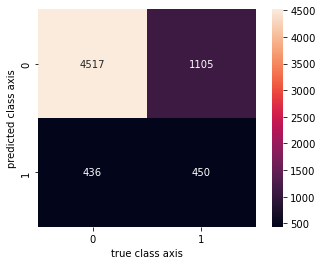

In [50]:
get_ipython().run_line_magic("matplotlib", "inline")
confusion_m = confusion_matrix(Y_test, Y_predict_n7)
sb.heatmap(confusion_m.T, square=True, annot=True, fmt='d', cbar ='False')
plt.xlabel("true class axis")
plt.ylabel("predicted class axis")

In [51]:
# knn model n = 25
knn_n25 = KNeighborsClassifier(n_neighbors=25).fit(X_train, Y_train)
Y_predict_n25 =knn_n25.predict(X_test)

In [52]:
accuracy = sm.accuracy_score(Y_test, Y_predict_n25)
precision = sm.precision_score(Y_test, Y_predict_n25)
recall = sm.recall_score(Y_test, Y_predict_n25)
print("Accuracy(%) = ", accuracy*100)
print("Precision (%) = ",precision *100)
print("Recall (%) = ",recall*100)
print('\nClassification Report: \n',classification_report(Y_test, Y_predict_n50))

Accuracy(%) =  77.48924400737553
Precision (%) =  70.45454545454545
Recall (%) =  9.967845659163988

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      4953
           1       0.75      0.01      0.02      1555

    accuracy                           0.76      6508
   macro avg       0.76      0.51      0.44      6508
weighted avg       0.76      0.76      0.66      6508



Text(83.40000000000006, 0.5, 'predicted class axis')

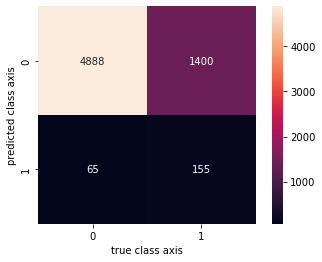

In [53]:
get_ipython().run_line_magic("matplotlib", "inline")
confusion_m = confusion_matrix(Y_test, Y_predict_n25)
sb.heatmap(confusion_m.T, square=True, annot=True, fmt='d', cbar ='False')
plt.xlabel("true class axis")
plt.ylabel("predicted class axis")

In [54]:
# knn model n = 50
knn_n50 = KNeighborsClassifier(n_neighbors=50).fit(X_train, Y_train)
Y_predict_n50 =knn_n50.predict(X_test)

In [55]:
accuracy = sm.accuracy_score(Y_test, Y_predict_n50)
precision = sm.precision_score(Y_test, Y_predict_n50)
recall = sm.recall_score(Y_test, Y_predict_n50)
print("Accuracy(%) = ", accuracy*100)
print("Precision (%) = ",precision *100)
print("Recall (%) = ",recall*100)
print('\nClassification Report: \n',classification_report(Y_test, Y_predict_n50))

Accuracy(%) =  76.29071911493547
Precision (%) =  75.0
Recall (%) =  1.157556270096463

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      4953
           1       0.75      0.01      0.02      1555

    accuracy                           0.76      6508
   macro avg       0.76      0.51      0.44      6508
weighted avg       0.76      0.76      0.66      6508



Text(83.40000000000006, 0.5, 'predicted class axis')

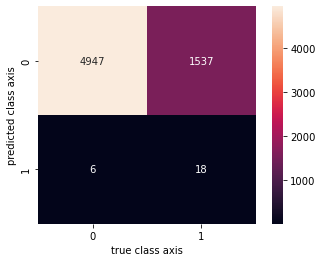

In [56]:
get_ipython().run_line_magic("matplotlib", "inline")
confusion_m = confusion_matrix(Y_test, Y_predict_n50)
sb.heatmap(confusion_m.T, square=True, annot=True, fmt='d', cbar ='False')
plt.xlabel("true class axis")
plt.ylabel("predicted class axis")